## Используемые библиотеки и функции

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
%matplotlib inline
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix, f1_score
from lightgbm import LGBMClassifier
from catboost import Pool, CatBoostClassifier

In [2]:
def plot_feature_importances(importances, X):
    
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize = (20, 6))
    plt.title("Feature importances", fontsize=16)
    plt.bar(range(X.shape[1]), importances[indices] / importances.sum(),
           color="darkblue", align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation = 90, fontsize=14)
    plt.xlim([-1, X.shape[1]])

    plt.tight_layout()
    plt.show()

In [3]:
def corelate_df(df, minimal):
    plt.figure(figsize = (15,10))

    sns.set(font_scale=1.4)

    corr_matrix = df.corr()
    corr_matrix = np.round(corr_matrix, 2)
    corr_matrix[np.abs(corr_matrix) <= minimal] = 0

    sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

    plt.title('Correlation matrix')
    plt.show()

## Данные

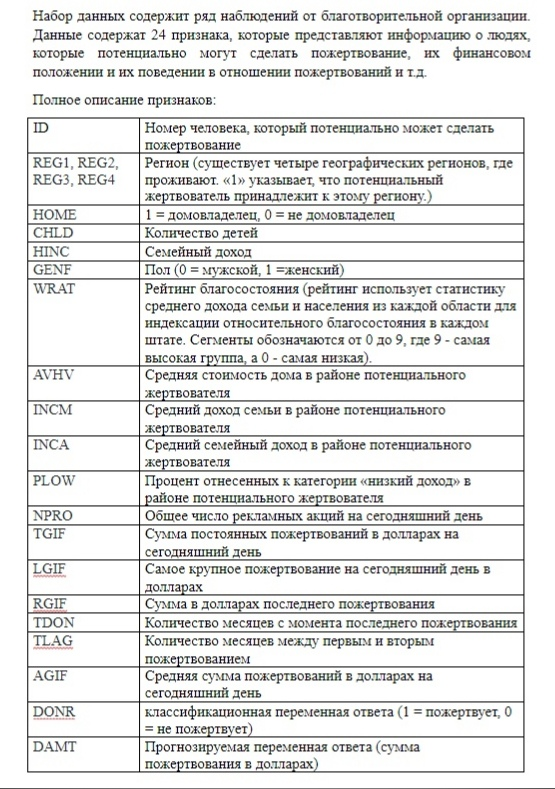

Ваша задача предсказать 'donr'

In [4]:
df_train = pd.read_csv('data/Real_Train_chr_data.csv')

x = df_train.drop('donr', axis=1)
y = df_train[['ID', 'donr']]
x.set_index('ID', inplace=True)
y.set_index('ID', inplace=True)

x_final = pd.read_csv('data/Real_Test_chr_data.csv')
x_final.set_index('ID', inplace=True)

print('Строк в трейне:' , x.shape[0])
print('Строк в тесте', x_final.shape[0])

Строк в трейне: 4201
Строк в тесте 1801


In [5]:
x.columns

Index(['Unnamed: 0', 'reg1', 'reg2', 'reg3', 'reg4', 'home', 'chld', 'hinc',
       'genf', 'wrat', 'avhv', 'incm', 'inca', 'plow', 'npro', 'tgif', 'lgif',
       'rgif', 'tdon', 'tlag', 'agif'],
      dtype='object')

In [6]:
columns_names = {'Unnamed: 0': 'unnamed',
                 'chld': 'children',
                 'hinc': 'household_income',
                 'genf': 'gender',
                 'wrat': 'rating',
                 'avhv': 'avg_house_price',
                 'incm': 'avg_income_household',
                 'inca': 'avg_household_income',
                 'plow': 'percent_low',
                 'npro': 'num_promo',
                 'tgif': 'sum_regular_gift',
                 'lgif': 'largest_gift',
                 'rgif': 'last_gift',
                 'tdon': 'months_last_gift',
                 'tlag': 'months_firsts_gifts',
                 'agif': 'avg_sum_gift'}

x.rename(columns=columns_names, inplace=True)
x_final.rename(columns=columns_names, inplace=True)

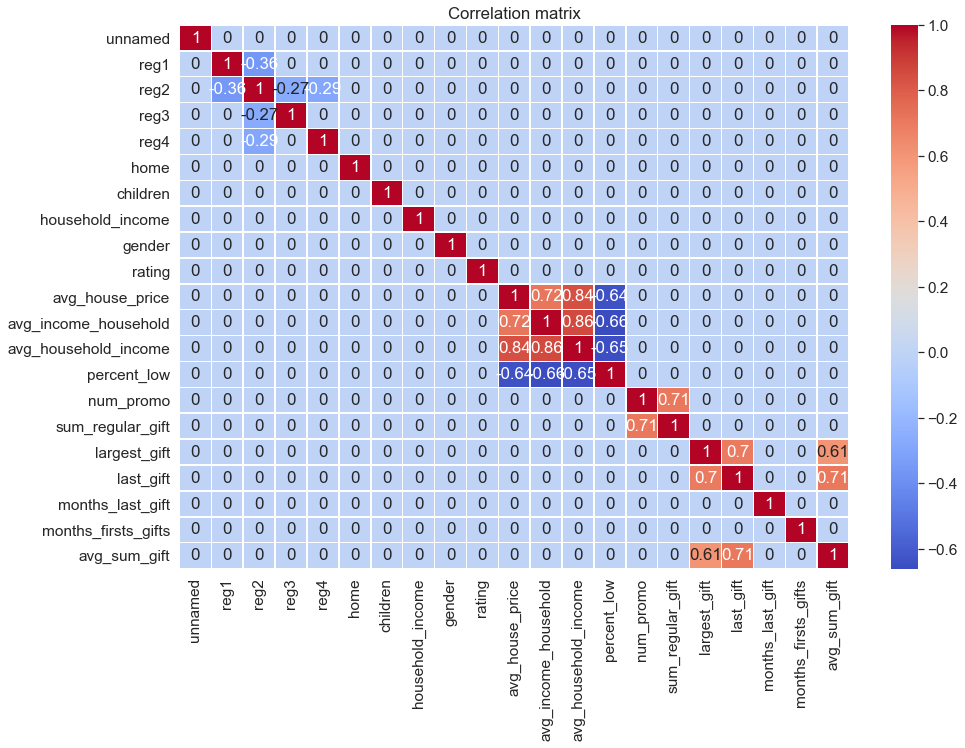

In [7]:
corelate_df(x, 0.2)

In [8]:
x['reg2'] *= 2
x['reg3'] *= 3
x['reg4'] *= 4
x['reg'] = x['reg1'] + x['reg2'] + x['reg3'] + x['reg4']

x_final['reg2'] *= 2
x_final['reg3'] *= 3
x_final['reg4'] *= 4
x_final['reg'] = x_final['reg1'] + x_final['reg2'] + x_final['reg3'] + x_final['reg4']

In [9]:
x['months'] = x['sum_regular_gift'] / x['avg_sum_gift']
x_final['months'] = x_final['sum_regular_gift'] / x_final['avg_sum_gift']

In [10]:
x.columns

Index(['unnamed', 'reg1', 'reg2', 'reg3', 'reg4', 'home', 'children',
       'household_income', 'gender', 'rating', 'avg_house_price',
       'avg_income_household', 'avg_household_income', 'percent_low',
       'num_promo', 'sum_regular_gift', 'largest_gift', 'last_gift',
       'months_last_gift', 'months_firsts_gifts', 'avg_sum_gift', 'reg',
       'months'],
      dtype='object')

In [11]:
remain_features = ['unnamed', 'home', 'children',
       'household_income', 'rating', 'avg_house_price',
       'avg_income_household', 'avg_household_income', 'percent_low',
       'num_promo', 'sum_regular_gift', 'last_gift',
       'months_last_gift', 'months_firsts_gifts', 'reg',
       'months']

x1 = x[remain_features]
x1_final = x_final[remain_features]

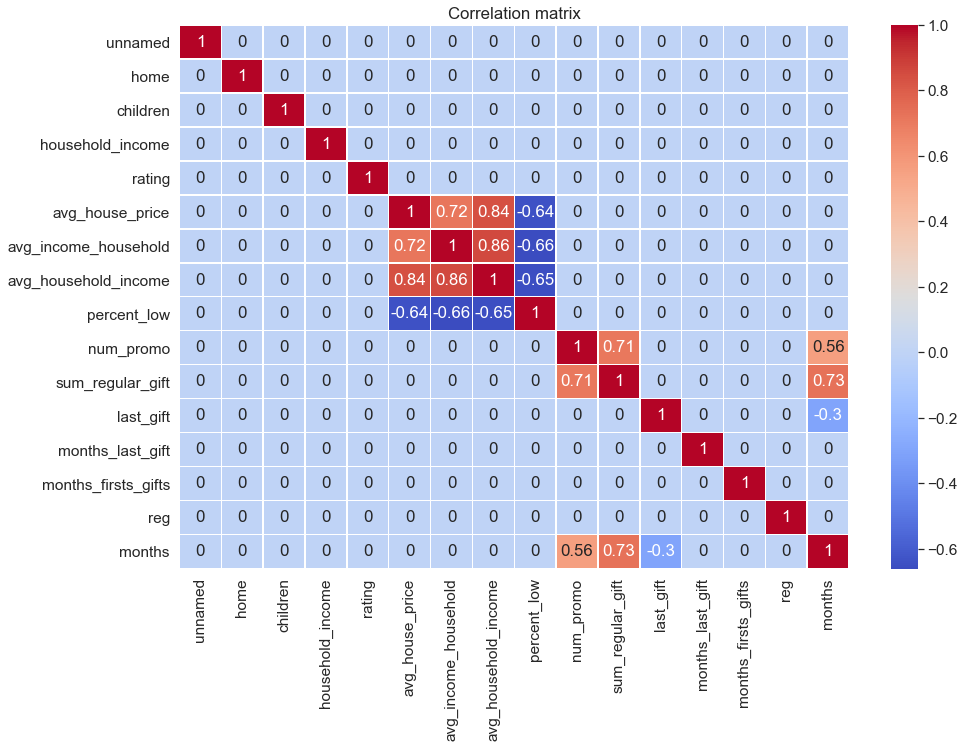

In [12]:
corelate_df(x1, 0.2)

## Тестируем модель

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

In [14]:
model = LGBMClassifier(random_state=42)

In [15]:
model.fit(x_train, y_train['donr'])

LGBMClassifier(random_state=42)

In [16]:
y_pred = model.predict(x_test)

In [18]:
f1_score(y_test['donr'], y_pred)

0.900943396226415

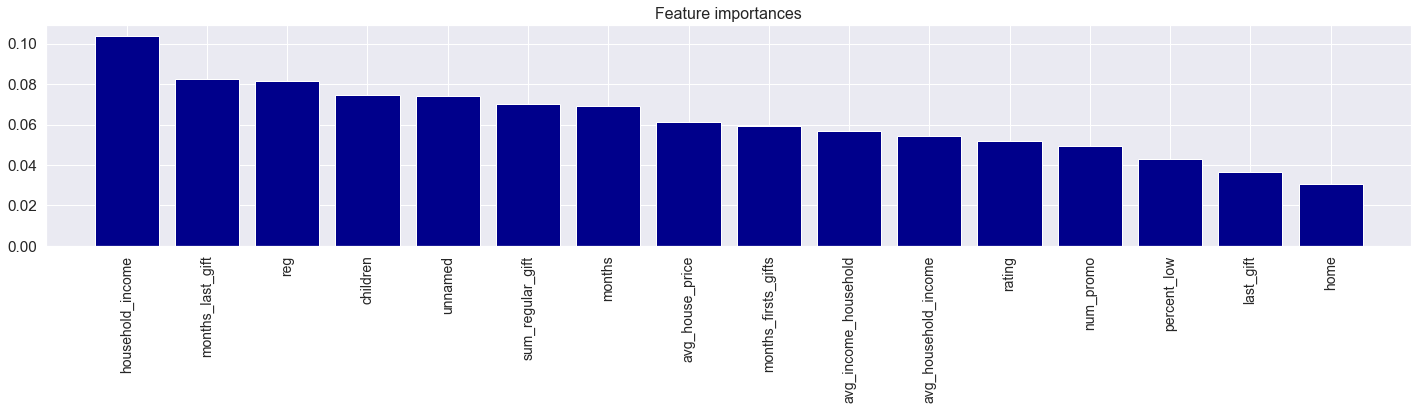

In [19]:
plot_feature_importances(importances = model.feature_importances_, X=x1)

## Catboost модель

In [61]:
remain_features = ['unnamed', 'home', 'children',
       'household_income', 'rating', 'avg_house_price',
       'avg_income_household', 'avg_household_income', 'percent_low',
       'num_promo', 'sum_regular_gift', 'last_gift',
       'months_last_gift', 'months_firsts_gifts', 'reg',
       'months']

x1 = x[remain_features]
x1_final = x_final[remain_features]

x1.head()

,unnamed,home,children,household_income,rating,avg_house_price,avg_income_household,avg_household_income,percent_low,num_promo,sum_regular_gift,last_gift,months_last_gift,months_firsts_gifts,reg,months
ID,,,,,,,,,,,,,,,,
1836,927,1,2,4,6,123,29,39,16,113,182,9,21,14,0,14.252153
6494,3258,1,3,4,0,147,19,46,27,87,133,18,19,5,4,7.837360
113,45,1,4,2,7,221,118,118,1,117,424,9,20,3,2,33.307148
2487,1260,1,1,4,6,166,28,41,21,97,304,27,10,6,0,17.746643
2153,1096,1,0,7,8,184,53,53,15,116,192,23,24,12,2,10.927718


In [62]:
cat_features = ["home", "reg"]

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)
eval_set = Pool(x_test, y_test, cat_features)

In [76]:
model = CatBoostClassifier(custom_loss=["Logloss", "F1"], use_best_model=True, random_state=42)

In [77]:
model.fit(x_train,
          y_train,
          cat_features=cat_features,
          eval_set=eval_set,
          verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [80]:
y_pred = model.predict(x_test)
f1_score(y_test['donr'], y_pred)

0.9106583072100313

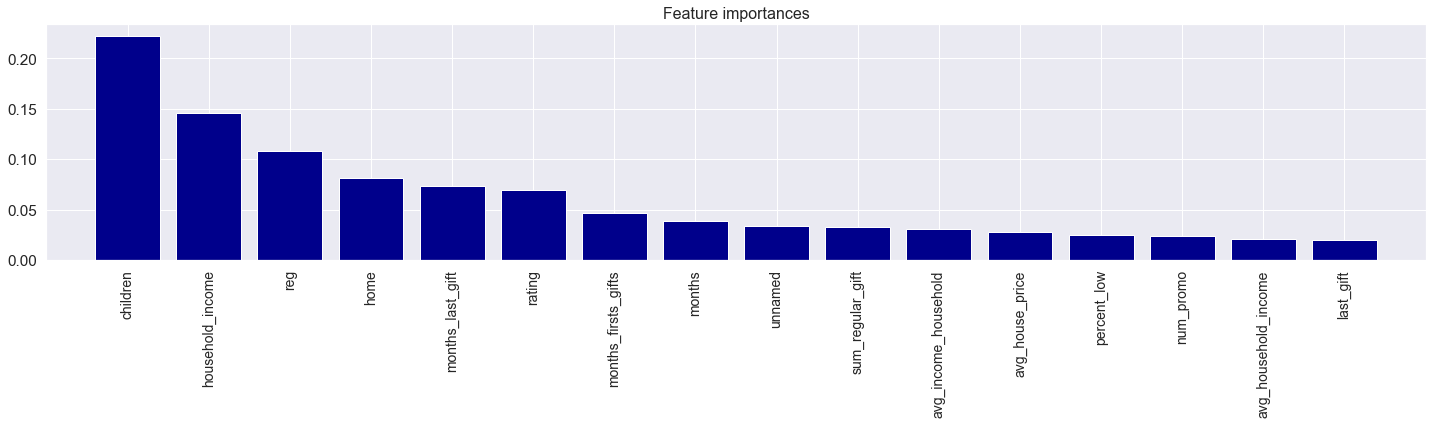

In [81]:
plot_feature_importances(importances = model.feature_importances_, X=x1)

## Финальное предсказание

In [60]:
model.fit(x1, y['donr'])

CatBoostError: To employ param {'use_best_model': True} provide non-empty 'eval_set'.

In [82]:
y_pred_final = model.predict(x1_final)
y_pred_final_df = pd.DataFrame(y_pred_final, columns=['donr'])

In [83]:
y_pred_final_df

,donr
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1796,1.0
1797,0.0
1798,1.0
1799,0.0


In [85]:
np.mean(y_pred_final_df['donr'])

0.5191560244308717

In [84]:
filename = '201212_Reznik_1.csv'
y_pred_final_df.to_csv(filename, index=None)